The dataset was downloaded from [Combining EEG and Eye-Tracking in Virtual Reality - Obtaining Fixation-Onset ERPs and ERSPs](https://osf.io/trfjw/).

### Importing packages & Loading the dataset ###

In [1]:
# importing all the necessery packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
from scipy.stats import median_abs_deviation

In [ ]:
"""
# filter by valid, hon, events = start of fix is "2"
# leave length (sec) = duration
df_filtered = df[(df['valid'] == 1) & (df['events'] == 2)]
df_filtered = df_filtered[['length', 'hon_all']]

# every hit object ('hon_all') which contains 'NPC' is a body
# every hit object ('hon_all') which contains 'face' is a face"""

In [2]:
## function_1 to compute descriptive metrics of duration durations of each type
def compute_fixation_durations(fixations_df, fixation_type):
    """
    Compute average, min, and max duration for a given fixation type.
    """
    type_fixations = fixations_df[fixations_df['hon_all'] == fixation_type]
    return type_fixations['length'].agg(['mean', 'min', 'max', 'sum', 'median'])

# function_2 to categorize fixations
def needed_categories(value):
    if pd.isnull(value):
        return value
    value_str = str(value)
    if 'NPC' in value_str:
        return 'body'
    elif 'face' in value_str:
        return 'face'
    else:
        return 'background'

In [ ]:
####### account for long events !!!

In [4]:
# where all participant folders are located
base_path = "/Users/alina/Downloads/Thesis/raw/VR"

fixation_analysis = [] # a list to keep general information
all_durations = []  # to keep all durations

# loading files as dfs
for file_index, file in enumerate(os.listdir(base_path)):
    try:
        df = pd.read_csv(os.path.join(base_path, file))
        # filter to leave only valid samples and only fixations (fixation start events)
        df_filtered = df[(df['valid'] == 1) & (df['events'] == 2) & (df['long_events'].notna())]

        # leave only duration and object columns
        df_filtered = df_filtered[['length', 'hon_all']]
        # categorizing fixations to face body background
        df_filtered['hon_all'] = df_filtered['hon_all'].apply(needed_categories)

        fixation_types = ['face', 'body', 'background']

        # durations df for all participants with fixation type
        for ft in fixation_types:
            durations = df_filtered[df_filtered['hon_all'] == ft]['length']
            for duration in durations:
                all_durations.append({
                    'Participant': file_index,
                    'Fixation Type': ft,
                    'Duration': duration
                })
        
        fixation_counts = {f"{ft} fixations": len(df_filtered[df_filtered['hon_all'] == ft]) for ft in fixation_types}
        total_fixations = sum(fixation_counts.values())

        # duration statistics per participant
        duration_stats = {ft: compute_fixation_durations(df_filtered, ft) for ft in fixation_types}

        # Append the participant data
        fixation_analysis.append({
            "Participant": file_index,  # Participant index is now being tracked by file_index
            **fixation_counts,
            "Total fixations": total_fixations,
            **{f"{ft} {stat} duration (s)": duration_stats[ft][stat] for ft in fixation_types for stat in ['mean', 'min', 'max', 'sum', 'median']},
        })

    except Exception as e:
        print(f"❌ Error processing file {file}: {e}")

# Create a DataFrame for the fixation analysis
fixation_analysis_df = pd.DataFrame(fixation_analysis)

# make a df with all durations for all recordings
durations_df = pd.DataFrame(all_durations)

save_path = os.path.join('/Users/alina/Downloads/Thesis/raw', f"VR fixation stats all recordings.csv")
fixation_analysis_df.to_csv(save_path, index=False)

fixation_analysis_df

❌ Error processing file .DS_Store: 'utf-8' codec can't decode byte 0xff in position 412: invalid start byte


,Participant,face fixations,body fixations,background fixations,Total fixations,face mean duration (s),face min duration (s),face max duration (s),face sum duration (s),face median duration (s),body mean duration (s),body min duration (s),body max duration (s),body sum duration (s),body median duration (s),background mean duration (s),background min duration (s),background max duration (s),background sum duration (s),background median duration (s)
0,0,210,710,4041,4961,0.236729,0.043,0.622,49.713,0.2120,0.224620,0.043,0.646,159.480,0.1955,0.203253,0.024,0.645,821.344,0.177
1,1,182,496,4269,4947,0.205385,0.044,0.644,37.380,0.1560,0.233010,0.043,0.644,115.573,0.2005,0.211933,0.023,0.647,904.742,0.188
2,2,42,627,4031,4700,0.202238,0.044,0.487,8.494,0.1945,0.216247,0.043,0.633,135.587,0.1890,0.215044,0.023,0.646,866.844,0.191
3,3,252,1021,3675,4948,0.221774,0.044,0.632,55.887,0.1890,0.215770,0.024,0.645,220.301,0.1780,0.190823,0.022,0.644,701.275,0.156
4,4,252,1025,3991,5268,0.209071,0.044,0.633,52.686,0.1615,0.203034,0.033,0.644,208.110,0.1570,0.193296,0.023,0.646,771.444,0.157
5,5,124,794,3401,4319,0.259427,0.044,0.633,32.169,0.2220,0.239800,0.043,0.644,190.401,0.2110,0.234010,0.020,0.645,795.869,0.211
6,6,21,745,3920,4686,0.212810,0.045,0.424,4.469,0.2000,0.231234,0.034,0.646,172.269,0.2000,0.211380,0.023,0.646,828.609,0.180
7,7,460,911,3229,4600,0.210846,0.044,0.634,96.989,0.1780,0.229447,0.024,0.645,209.026,0.1890,0.200463,0.024,0.647,647.296,0.173
8,9,163,825,4044,5032,0.234153,0.043,0.645,38.167,0.1880,0.205194,0.043,0.645,169.285,0.1670,0.200003,0.024,0.645,808.813,0.177
9,10,81,303,4496,4880,0.214852,0.044,0.600,17.403,0.2000,0.229376,0.042,0.622,69.501,0.2000,0.215592,0.022,0.645,969.303,0.189


In [23]:
durations_df

,Participant,Fixation Type,Duration
0,0,face,0.411
1,0,face,0.355
2,0,face,0.299
3,0,face,0.267
4,0,face,0.388
...,...,...,...
94019,19,background,0.322
94020,19,background,0.100
94021,19,background,0.488
94022,19,background,0.067


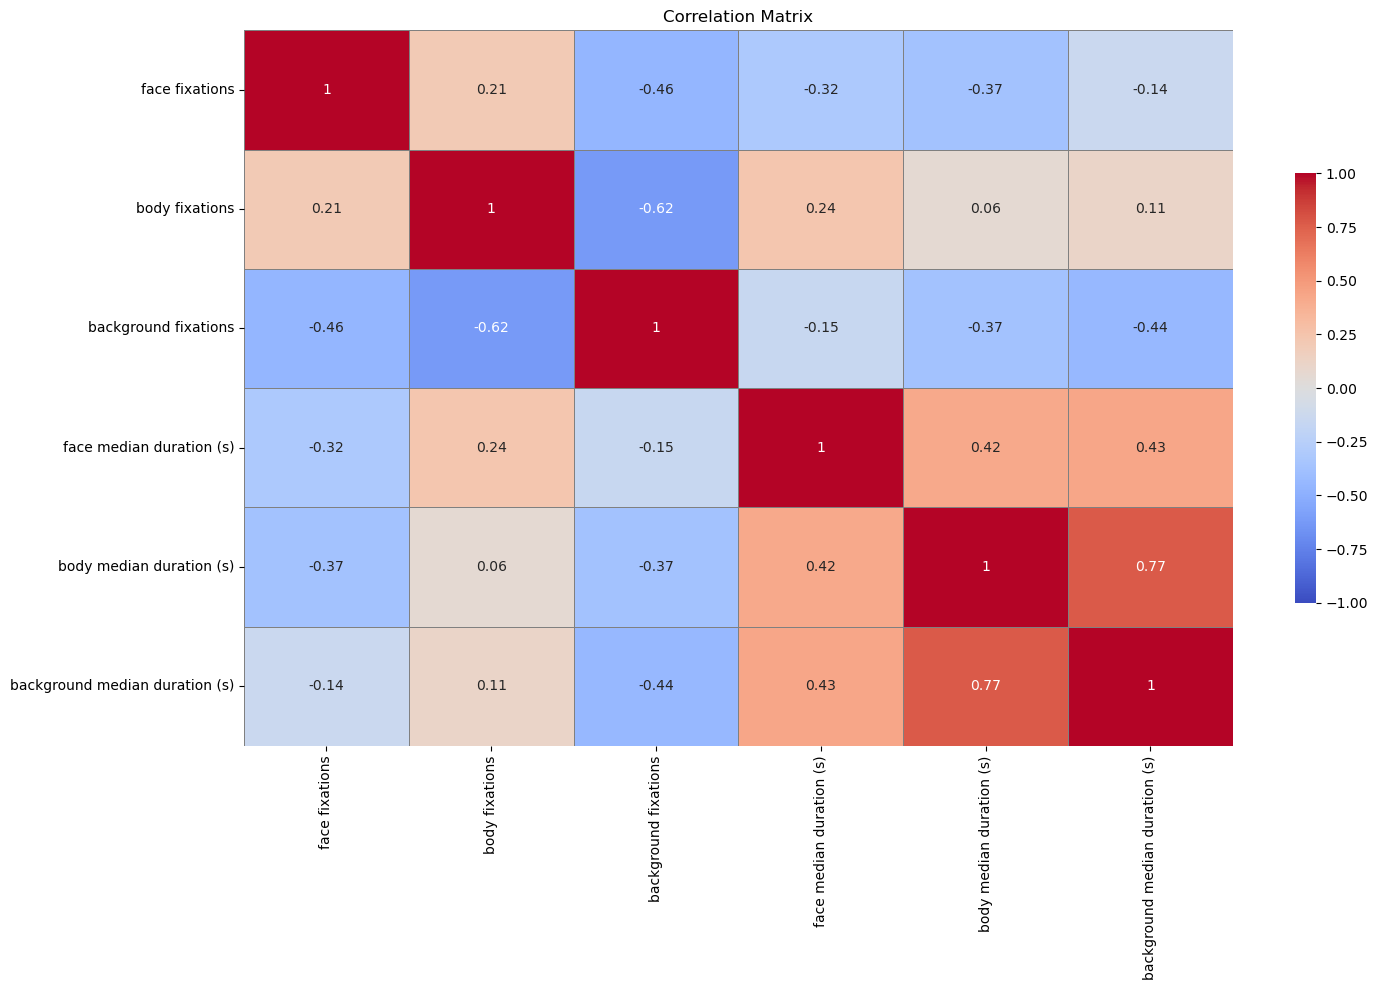

In [9]:
cols_to_exclude = ['Participant', 'Total fixations', 
                   'face sum duration (s)', 'body sum duration (s)', 'background sum duration (s)',
                   'face min duration (s)', 'body min duration (s)', 'background min duration (s)',
                   'face max duration (s)', 'body max duration (s)', 'background max duration (s)',
                   'face mean duration (s)', 'body mean duration (s)', 'background mean duration (s)']

# a new df excluding those columns for correlations
df_corr = fixation_analysis_df.drop(columns=cols_to_exclude)
corr_matrix = df_corr.corr().round(2)

plt.figure(figsize=(15, 10))

sns.heatmap(
    corr_matrix ,               
    annot=True,                  
    cmap='coolwarm',             
    vmin=-1, vmax=1,             
    center=0,                    
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.6}
)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [6]:
# Check if correlation is significant; r = Pearson correlation coefficient
r, p= scipy.stats.pearsonr(fixation_analysis_df["face fixations"], fixation_analysis_df["body fixations"])
display(r)
display(round(p,3))

0.20698398261852424

0.248

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_40375/386760359.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_40375/386760359.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


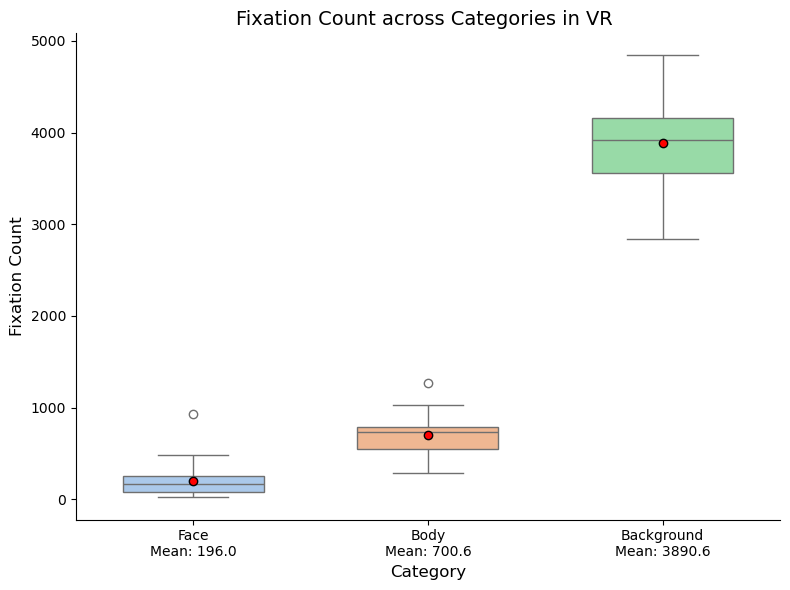

In [7]:
### Fixation count per category box plot

# getting fixation count columns
fixation_cols = ['face fixations', 'body fixations', 'background fixations']

# reshaping df to a long format
fixation_melted = fixation_analysis_df.melt(
    id_vars=['Participant'],
    value_vars=fixation_cols,
    var_name='Category',
    value_name='Fixation Count'
)

# renaming categories
fixation_melted['Category'] = fixation_melted['Category'].str.replace(' fixations', '').str.capitalize()

# defining order of categories based on fixation_cols
category_order = [col.replace(' fixations', '').capitalize() for col in fixation_cols]

# calculating means
group_means = fixation_melted.groupby('Category')['Fixation Count'].mean()
#group_medians = fixation_melted.groupby('Category')['Fixation Count'].median()

# making labels with category + mean
new_labels = [f"{cat}\nMean: {group_means[cat]:.1f}" for cat in category_order]

# box-plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=fixation_melted,
    x='Category',
    y='Fixation Count',
    order=category_order,
    palette='pastel',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
    width=0.6
)

# to include mean info in labels
ax.set_xticklabels(new_labels)

ax.set_title("Fixation Count across Categories in VR ", fontsize=14)
ax.set_ylabel("Fixation Count", fontsize=12)
ax.set_xlabel("Category", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

Fixation Type
background     78.0
body          100.0
face           99.0
Name: Duration, dtype: float64

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_40375/4173642580.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_40375/4173642580.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=11)


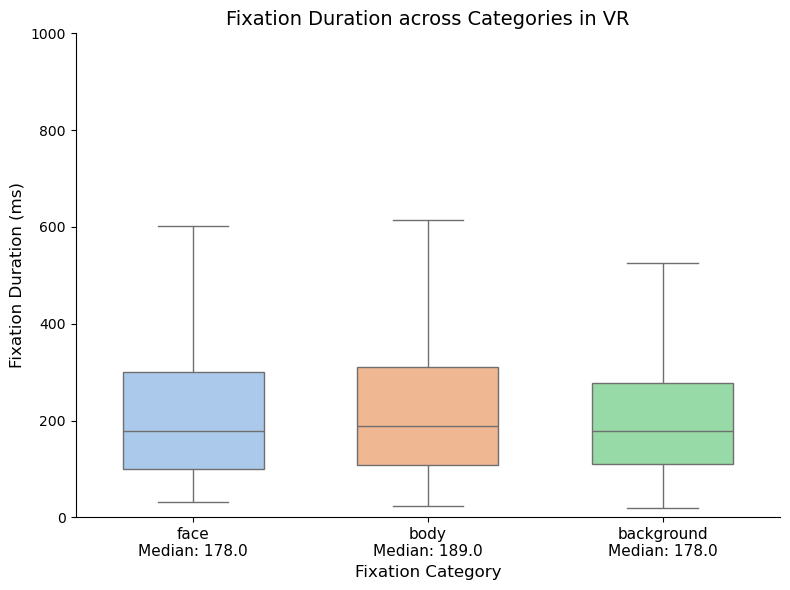

In [8]:
### Fixation durations per category box plot

# convert durations to ms (to compare with real world data)
durations_df['Duration'] = durations_df['Duration'] * 1000

# compute medians per group (fixation type)
group_medians = durations_df.groupby("Fixation Type")["Duration"].median().round(0)

# MAD
group_mad = durations_df.groupby("Fixation Type")["Duration"].apply(median_abs_deviation).round(2)

display(group_mad)

category_order = ['face', 'body', 'background']

# Create new labels with mean annotation
new_labels = [f"{cat}\nMedian: {group_medians[cat]}" for cat in category_order]

# if i want to add MAD to the label
#new_labels = [
    #f"{cat.capitalize()}\nMedian: {group_medians[cat]:.0f}\nMAD: {group_mad[cat]:.1f}"
    #for cat in category_order]

# box-plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=durations_df,
    x="Fixation Type",
    y="Duration",
    order=category_order,
    palette="pastel",
    #showmeans=True,
    showfliers=False, # not showing outliers
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
    width=0.6
)

# to include the median in the labels
ax.set_xticklabels(new_labels, fontsize=11)

ax.set_title("Fixation Duration across Categories in VR", fontsize=14)
ax.set_ylabel("Fixation Duration (ms)", fontsize=12)
ax.set_ylim(0,1000)  # Set y-axis limits 
ax.set_xlabel("Fixation Category", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()